   danceability    energy       tempo   valence  acousticness  \
0      0.674507  0.885236   80.097910  0.408670      0.284450   
1      0.579260  1.000000   72.548141  0.546170      0.130274   
2      0.697153  0.420286  136.371630  0.163218      0.407443   
3      0.828454  0.812594  144.777087  0.257096      0.211766   
4      0.564877  0.569871   63.790337  0.800103      0.099683   

   instrumentalness  liveness  speechiness   loudness  duration_ms  popularity  
0          0.040892  0.271141     0.093573 -40.789130       223235          11  
1          0.140585  0.511291     0.067416 -19.784761       165510          19  
2          0.253578  0.280804     0.000000 -48.725785       207945          44  
3          0.030382  0.115193     0.179974 -22.512276       190649          63  
4          0.006021  0.157624     0.135157 -39.812979       226723          58  


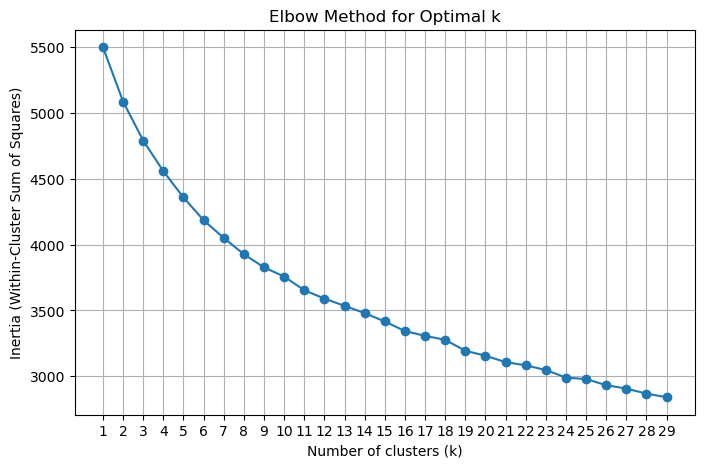

Cluster Summary:
     cluster  popularity_mean  popularity_count  danceability_mean  \
0         0            28.81                37               0.57   
1         1            61.53                30               0.73   
2         2            75.94                35               0.50   
3         3            25.77                26               0.67   
4         4            56.83                30               0.62   
5         5            54.03                30               0.54   
6         6            59.56                18               0.51   
7         7            30.43                21               0.46   
8         8            35.84                19               0.53   
9         9            57.35                26               0.55   
10       10            75.52                29               0.61   
11       11            34.57                28               0.43   
12       12            55.43                23               0.59   
13       13     

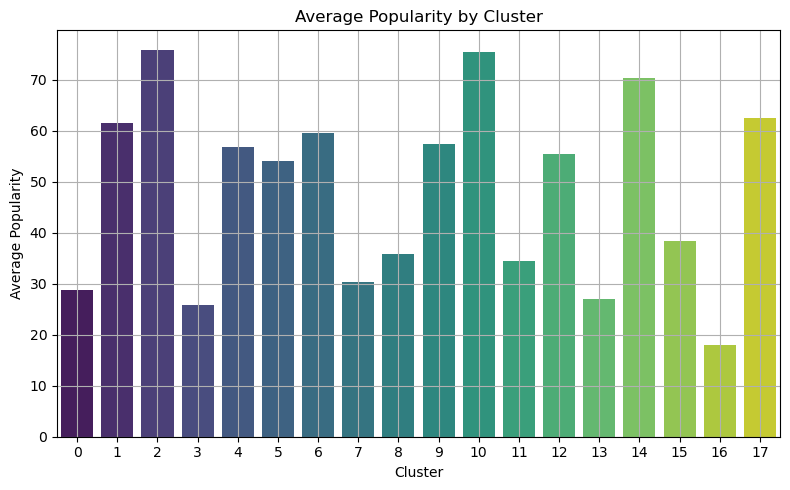

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('downloads/sample_spotify_audio_features.csv')  

print(df.head())

numerical_features = [
    'danceability', 'energy', 'acousticness',
    'instrumentalness', 'liveness', 'valence',
    'tempo', 'speechiness', 'popularity'
]
df_clean = df.dropna(subset=numerical_features)

df_clean = df_clean.drop_duplicates()

df_clean = df_clean[df_clean['popularity'] > 0]


features_for_clustering = df_clean[numerical_features]
X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

k = 18
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


cluster_summary = df.groupby('cluster').agg({
    'popularity': ['mean', 'count'],
    'danceability': 'mean',
    'energy': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean'
}).round(2)


cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary = cluster_summary.reset_index()


print("Cluster Summary:\n", cluster_summary)


plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_summary, x='cluster', y='popularity_mean', palette='viridis')
plt.title('Average Popularity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()
